## Collecting Tesla Articles Using News API

In [1]:
import requests

### Introduction to the API
The Api extracts all articles around the web using the keyword search of tesla within a date range(last month) using an api key. The various attributes to the articles are that it has source,content or news content of the article, published date and who published it.

In [2]:
API_KEY = 'dc8a037af3f4470a9c525230a5707643'
url = f'https://newsapi.org/v2/everything?q=tesla&from=2023-08-02&sortBy=publishedAt&apiKey={API_KEY}'

### Parsing the Json

In [3]:
response = requests.get(url)
data = response.json()
print(response.status_code)

200


In [4]:
print(data['articles'])

[{'source': {'id': None, 'name': 'Marketscreener.com'}, 'author': 'Dow Jones', 'title': 'Tech Up After Mixed Earnings -- Tech Roundup', 'description': '(marketscreener.com) \n Shares of technology companies companies ticked up amid mixed earnings reports. \n\n Shares of chipmaker Broadcom fell sharply after the chipmaker logged second-quarter profit shy of some Wall Street tarets. \n\n Shares of hardware and serv…', 'url': 'https://www.marketscreener.com/news/latest/Tech-Up-After-Mixed-Earnings-Tech-Roundup--44758138/', 'urlToImage': 'https://www.marketscreener.com/images/twitter_MS_fdnoir.png', 'publishedAt': '2023-09-01T21:17:03Z', 'content': 'Shares of technology companies companies ticked up amid mixed earnings reports. \r\nShares of chipmaker Broadcom fell sharply after the chipmaker logged second-quarter profit shy of some Wall Street ta… [+611 chars]'}, {'source': {'id': None, 'name': 'Biztoc.com'}, 'author': 'electrek.co', 'title': "Tesla cuts its Full Self-Driving Beta's US pr

In [5]:
articles = data['articles']

created a new list and added the required sections of the articles like source,title, Description of each article and the reference of the artice

In [6]:
import pandas as pd
news_list = []

In [7]:
for article in articles:
    news_list.append({'source': article['source']['name'],
                      'title':article['title'],
                      'Description':article['content'],
                      'url':article['url']})


In [8]:
news_df = pd.DataFrame(news_list)
news_df

,source,title,Description,url
0,Marketscreener.com,Tech Up After Mixed Earnings -- Tech Roundup,Shares of technology companies companies ticke...,https://www.marketscreener.com/news/latest/Tec...
1,Biztoc.com,Tesla cuts its Full Self-Driving Beta's US pri...,Tesla has cut the price of its Full Self-Drivi...,https://biztoc.com/x/f79b313f9380cd3a
2,N-tv.de,"""Weder Fisch noch Fleisch"": US-Arbeitsmarktdat...",Mit viel Spannung warten die Börsianer auf die...,https://www.n-tv.de/wirtschaft/US-Arbeitsmarkt...
3,Investopedia,S&P 500 Gains and Losses Today: Index Little C...,"<ul><li>U.S. equities were mixed, with the S&a...",https://www.investopedia.com/s-and-p-gains-and...
4,Mobile-review.com,Субботний кофе №264,"! Apple 12 13:00 . iPhone 15 , , - . , «», , 5...",https://mobile-review.com/all/articles/saturda...
...,...,...,...,...
95,Biztoc.com,Tesla Significantly Cuts Model S/Model X Price...,Tesla has removed the Standard Range variant f...,https://biztoc.com/x/430b6bee2d4a89ba
96,Biztoc.com,Go inside the redesigned Tesla Model 3,The Tesla Model 3 has slightly more range than...,https://biztoc.com/x/067bc872be566709
97,Fortune,"Ahead of possible strike, auto workers accuse ...",The United Auto Workers union says it has file...,https://fortune.com/2023/09/01/uaw-strike-unfa...
98,PCMag.com,Tesla Debuts New Model 3 In China Ahead of US,The rumors are true: Tesla has been quietly co...,https://uk.pcmag.com/cars-auto/148480/tesla-de...


Since Telsa has many electrical models which has various kinds like compact,SUV and others. In the exercise we are trying to extract all the articles that describes Model 3 of tesla.
- Within this API I am trying to get all the information that got published on Model 3 which references to its market share, reviews from different publishers and many others. 
- Trying to do Sentimental analysis as a Demonstration for this exercise.


In [9]:
import re

pattern = r'\bModel 3\b'  # \b ensures it matches the whole word

# Create an empty list to store matching descriptions
matching_descriptions = []

for description in news_df['Description']:
    if isinstance(description, str):
        match = re.search(pattern, description, flags=re.IGNORECASE)
        if match:
            matching_descriptions.append(description)

# Display the descriptions that match the pattern
for i, matched_description in enumerate(matching_descriptions, start=1):
    print(f"Match {i}: {matched_description}")


Match 1: Tesla has cut the price of its Full Self-Driving (FSD) software by $3,000, to $12K, down from $15K in the US.North America might not have gotten an official Model 3 refresh announcement yet like Euro… [+276 chars]
Match 2: 30As ações da Tesla (TSLA) caíam quase 6% nesta sexta-feira, depois que a montadora apresentou um novo Model 3, fabricado na China, com um preço mais alto, ao mesmo tempo em que reduziu os preços de … [+1773 chars]
Match 3: Tesla has once again made headlines by reducing the prices of its Model S and Model X vehicles in both Canada and the United States. This move comes on the heels of Tesla announcing new Model 3 offer… [+1362 chars]
Match 4: Tesla Officially Announces the Refreshed Model 3 'Highland' With Ambient Lighting, Rear Screen and Ventilated Seats [Photos/Video]Tesla's very public secret, codenamed Highland, is now in showrooms i… [+297 chars]
Match 5: As ações da Tesla caíam quase 6% nesta sexta-feira, depois que a montadora apresentou um novo Mod

## Sentimental Analysis

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [55]:
## Assuming from PA01 using compound of a sentence > 0.2 as positive sentence and < 0.2 as Negative sentence
## and others as a Nuetral sentence
Negative_articles = 0
Positive_articles = 0
Nuetral_articles  = 0

df_list = []

for i, matched_description in enumerate(matching_descriptions, start=1):
    if analyzer.polarity_scores(matched_description)['compound']>=0.1:
        Positive_articles +=1
        df_list.append({'Article': matched_description,
                      'Sentiment':analyzer.polarity_scores(matched_description)['compound'],
                      'Polarity':'Positive',
                      'Color': 'green'})
        print(f"Match {i}: {analyzer.polarity_scores(matched_description)} - Positive article")
    elif analyzer.polarity_scores(matched_description)['compound']<=-0.1:
        df_list.append({'Article': matched_description,
                        'Sentiment':analyzer.polarity_scores(matched_description)['compound'],
                        'Polarity':'Negative',
                        'Color':'red'})
        Negative_articles +=1
        print(f"Match {i}: {analyzer.polarity_scores(matched_description)} - Negative article")
    else:
        df_list.append({'Article': matched_description,
                        'Sentiment':analyzer.polarity_scores(matched_description)['compound'],
                        'Polarity':'Nuetral',
                        'Color': 'blue'})
        Nuetral_articles +=1
        print(f"Match {i}: {analyzer.polarity_scores(matched_description)} - Neutral article")

Match 1: {'neg': 0.054, 'neu': 0.881, 'pos': 0.065, 'compound': 0.1027} - Positive article
Match 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} - Neutral article
Match 3: {'neg': 0.0, 'neu': 0.928, 'pos': 0.072, 'compound': 0.4215} - Positive article
Match 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} - Neutral article
Match 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} - Neutral article
Match 6: {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.6361} - Positive article
Match 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} - Neutral article
Match 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} - Neutral article
Match 9: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} - Neutral article
Match 10: {'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.4588} - Positive article
Match 11: {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.4588} - Positive article
Match 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} -

In [56]:
print('No_of_positive_articles:',Positive_articles)
print('No_of_negative_articles:',Negative_articles)
print('No_of_nuetral_articles:',Nuetral_articles)

No_of_positive_articles: 8
No_of_negative_articles: 0
No_of_nuetral_articles: 7


In [57]:
df = pd.DataFrame(df_list)
df

,Article,Sentiment,Polarity,Color
0,Tesla has cut the price of its Full Self-Drivi...,0.1027,Positive,green
1,30As ações da Tesla (TSLA) caíam quase 6% nest...,0.0000,Nuetral,blue
2,Tesla has once again made headlines by reducin...,0.4215,Positive,green
3,Tesla Officially Announces the Refreshed Model...,0.0000,Nuetral,blue
4,As ações da Tesla caíam quase 6% nesta sexta-f...,0.0000,Nuetral,blue
5,"On the Electrek Podcast, we discuss the most p...",0.6361,Positive,green
6,Model 3 FSD9/2Tesla\r\n1. feature phone 3G4G4G...,0.0000,Nuetral,blue
7,Büyük sat baarsyla dikkat çeken Tesla’nn en uc...,0.0000,Nuetral,blue
8,"Tesla,geçtiimiz gün Model 3’ün yeni versiyonun...",0.0000,Nuetral,blue
9,Tesla (or at least Tesla Europe) is finally re...,0.4588,Positive,green


In [58]:
from matplotlib import pyplot as plt

Text(0.5, 0, '')

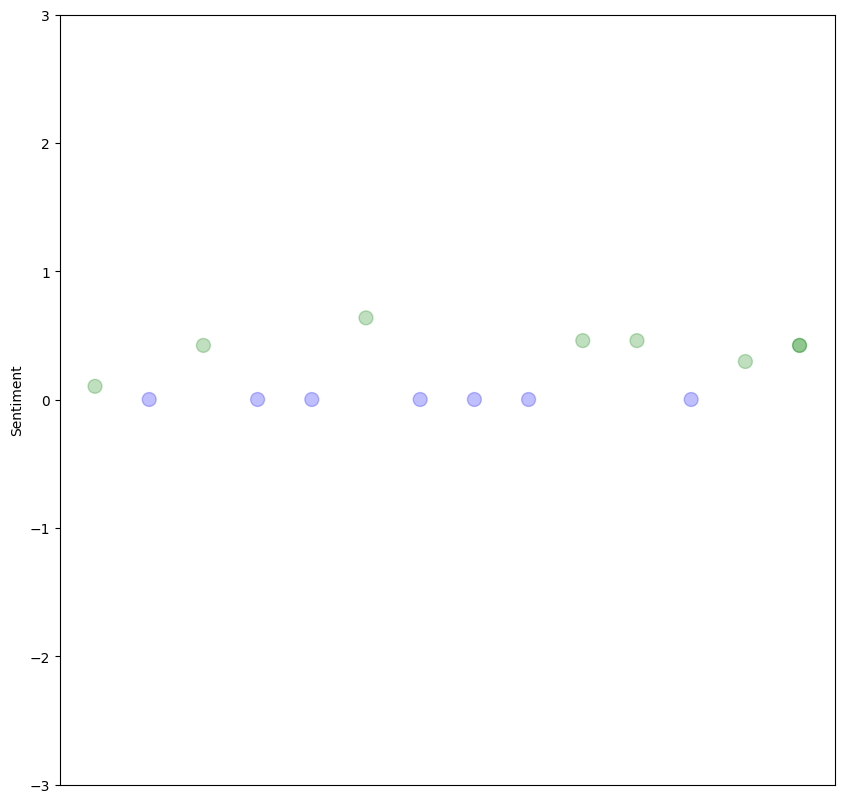

In [61]:
ax = df.plot.scatter(x='Article',y='Sentiment',figsize=(10,10),s=100,c=df['Color'], alpha=0.25)

ax.set_ylim(-3,3)
ax.xaxis.set_tick_params(bottom=False, labelbottom=False)

# set the x-axis label
plt.xlabel('',fontsize=20)

Summary of demonstration:
- In total there are about 15 articles that got published regarding Model 3 of tesla in the previous month 
- Statistics of sentiments of articles have been found.
- Since there are 8 positive and 7 nuetral articles we can say that Model 3 of tesla has a positive review from the data collected from the API

### Summary of API:

- Market Analysis :
Using this API Data Mining projects can analyze the market share of a product, analyze the trends in product production, consumption and various other factors. Compare the product of tesla with similar product from other brand.
- Sentiment Analysis:
Natural Language Processing techniques can be used to convey positive,negative and nuetral reviews of the product and improve on the corpus to include these reviews.
- Predictive Modeling:
The data collected can be used to build predictive models and increase or decrease stock based on the models.
- Keyword Detection:
The NLP techniques can be used to detect particular features of the product and news about the component.
- Monitoring of news trends:
Data mining projects can benefit from this feature by continuously collecting and analyzing news articles to identify emerging patterns and trends in Tesla-related discussions.